Name= Natender<br>
Matriculation No= 58273841<br>


In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
df = pd.read_csv('train.csv')
print(df.head())
print(df.info())

              datetime  season  holiday  workingday  weather  temp   atemp  \
0  2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1  2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2  2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3  2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4  2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  
0        81        0.0       3          13     16  
1        80        0.0       8          32     40  
2        80        0.0       5          27     32  
3        75        0.0       3          10     13  
4        75        0.0       0           1      1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-n

In [68]:
df['datetime'] = pd.to_datetime(df['datetime'])
df['hour'] = df['datetime'].dt.hour
df['month'] = df['datetime'].dt.month
df['year'] = df['datetime'].dt.year
df['dayofweek'] = df['datetime'].dt.day_name()
print(df)
print(df.dtypes)
print(df.shape)
print(df.isnull().sum())

                 datetime  season  holiday  workingday  weather   temp  \
0     2011-01-01 00:00:00       1        0           0        1   9.84   
1     2011-01-01 01:00:00       1        0           0        1   9.02   
2     2011-01-01 02:00:00       1        0           0        1   9.02   
3     2011-01-01 03:00:00       1        0           0        1   9.84   
4     2011-01-01 04:00:00       1        0           0        1   9.84   
...                   ...     ...      ...         ...      ...    ...   
10881 2012-12-19 19:00:00       4        0           1        1  15.58   
10882 2012-12-19 20:00:00       4        0           1        1  14.76   
10883 2012-12-19 21:00:00       4        0           1        1  13.94   
10884 2012-12-19 22:00:00       4        0           1        1  13.94   
10885 2012-12-19 23:00:00       4        0           1        1  13.12   

        atemp  humidity  windspeed  casual  registered  count  hour  month  \
0      14.395        81     0.000

Q1Plot the distributions of all the numerical columns in the dataset using 
histograms.


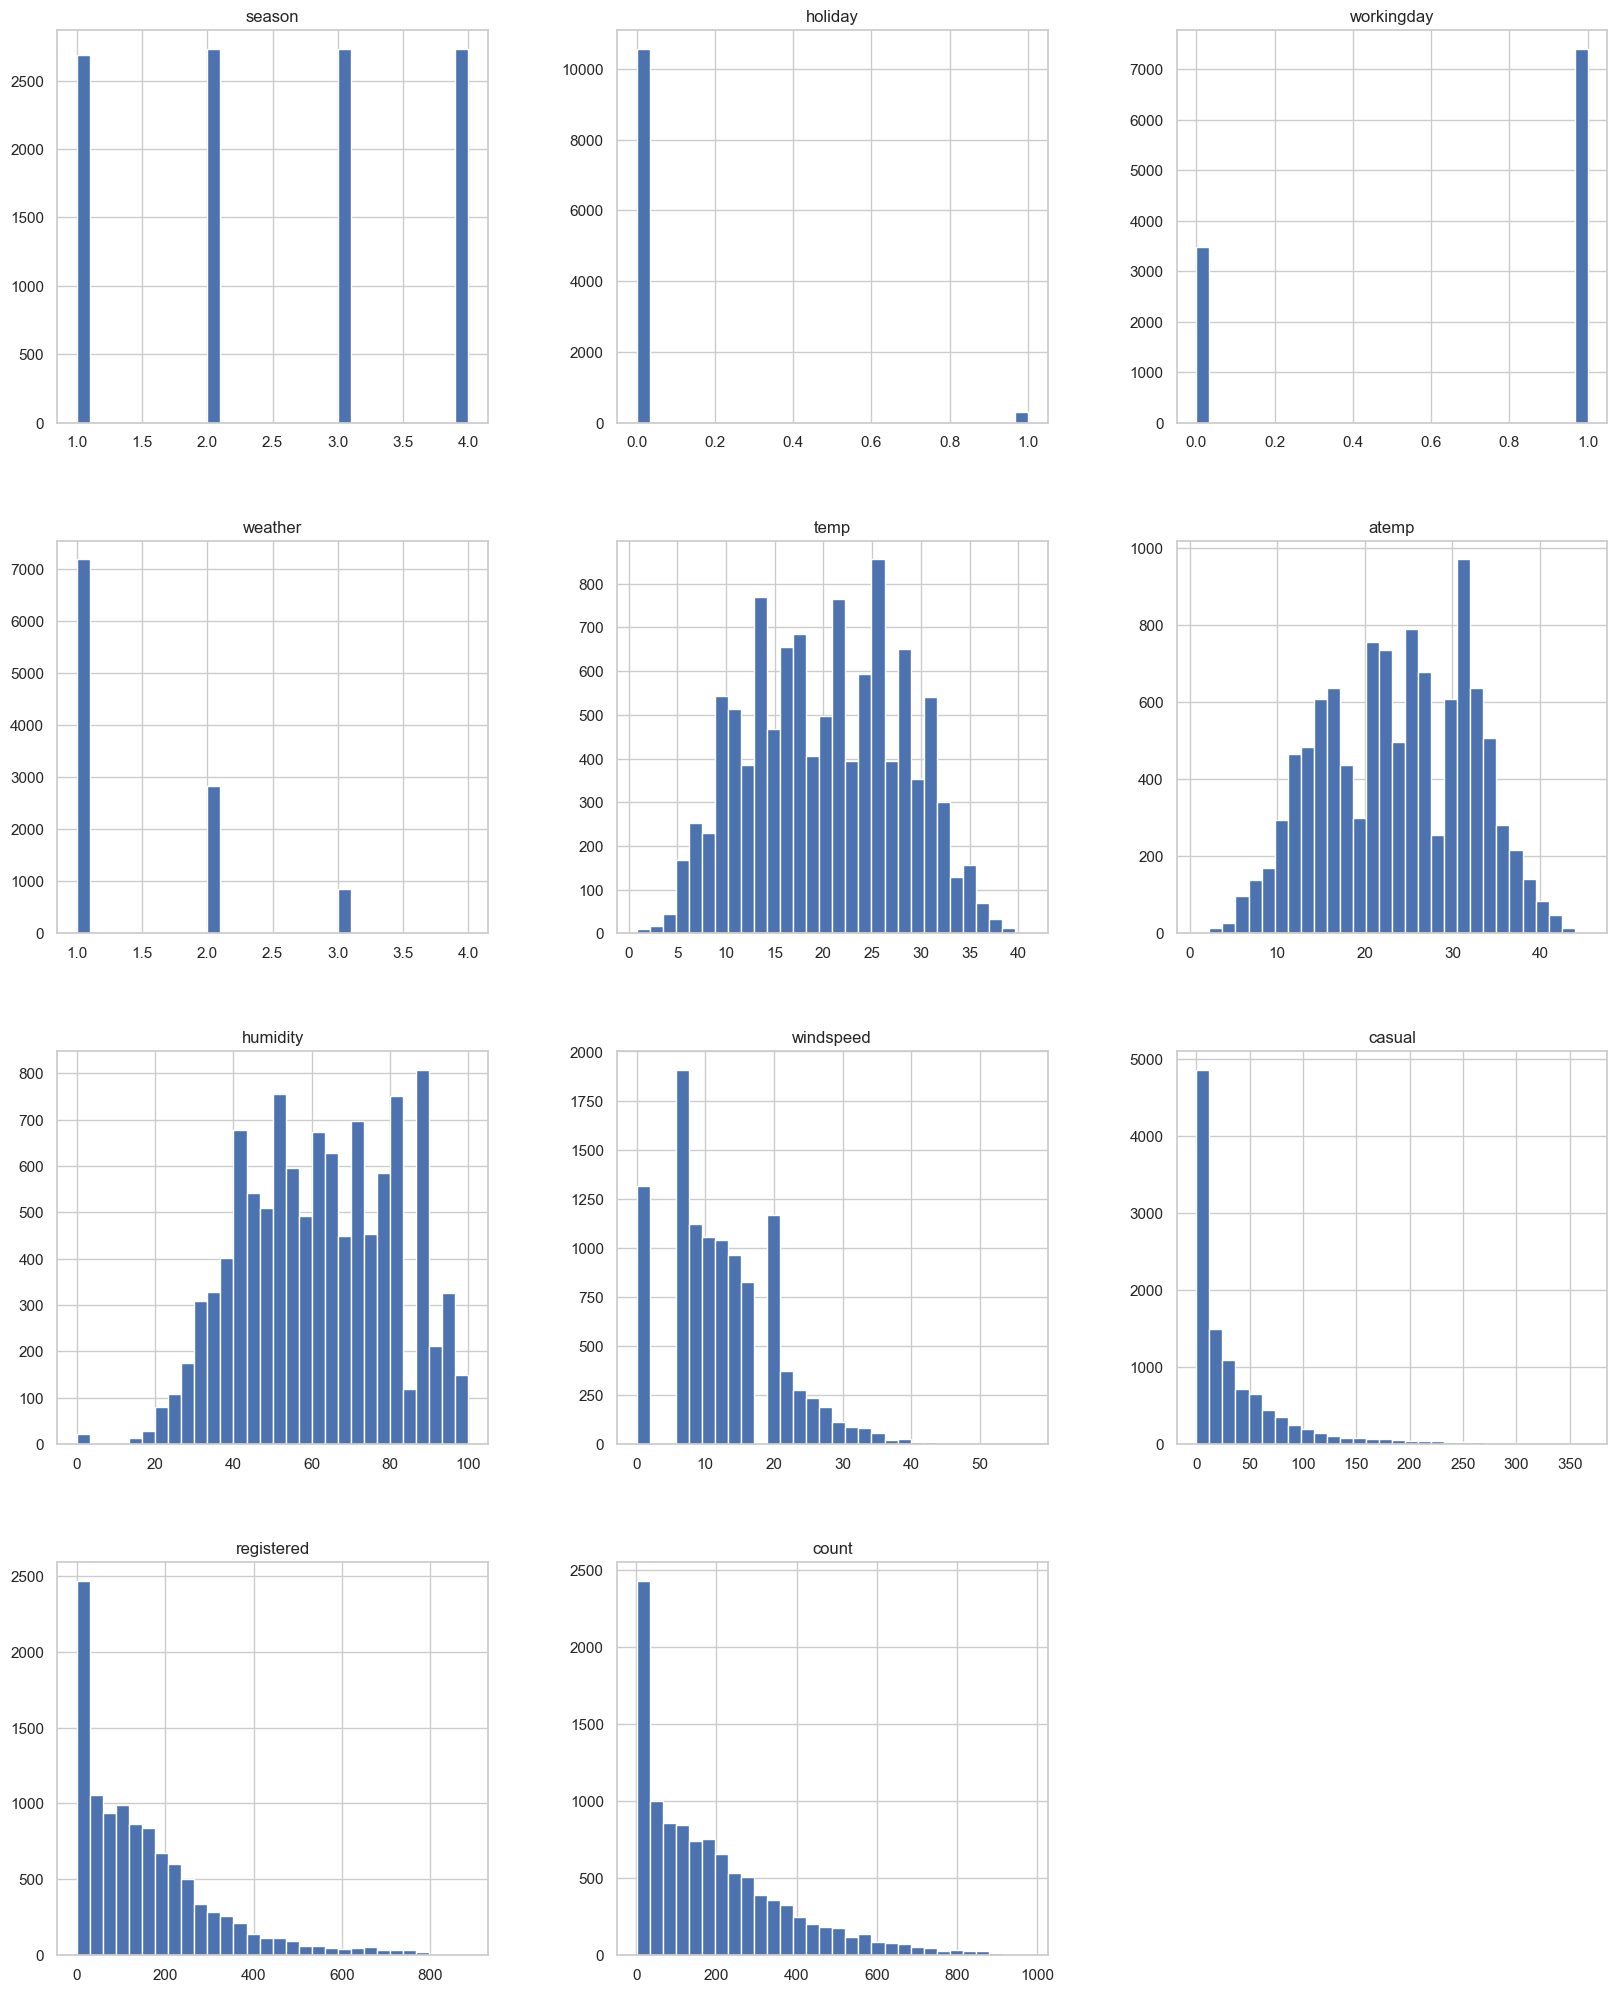

In [69]:
num_col= df.select_dtypes(include=['int64','float64']).columns
sns.set_theme(style="whitegrid")
df[num_col].hist(bins=30, figsize=(20,25))
plt.xlabel(num_col)
plt.ylabel("Frequency")
plt.show()

Q2 Plot the distributions of all the numerical columns in the dataset using box 
plots.

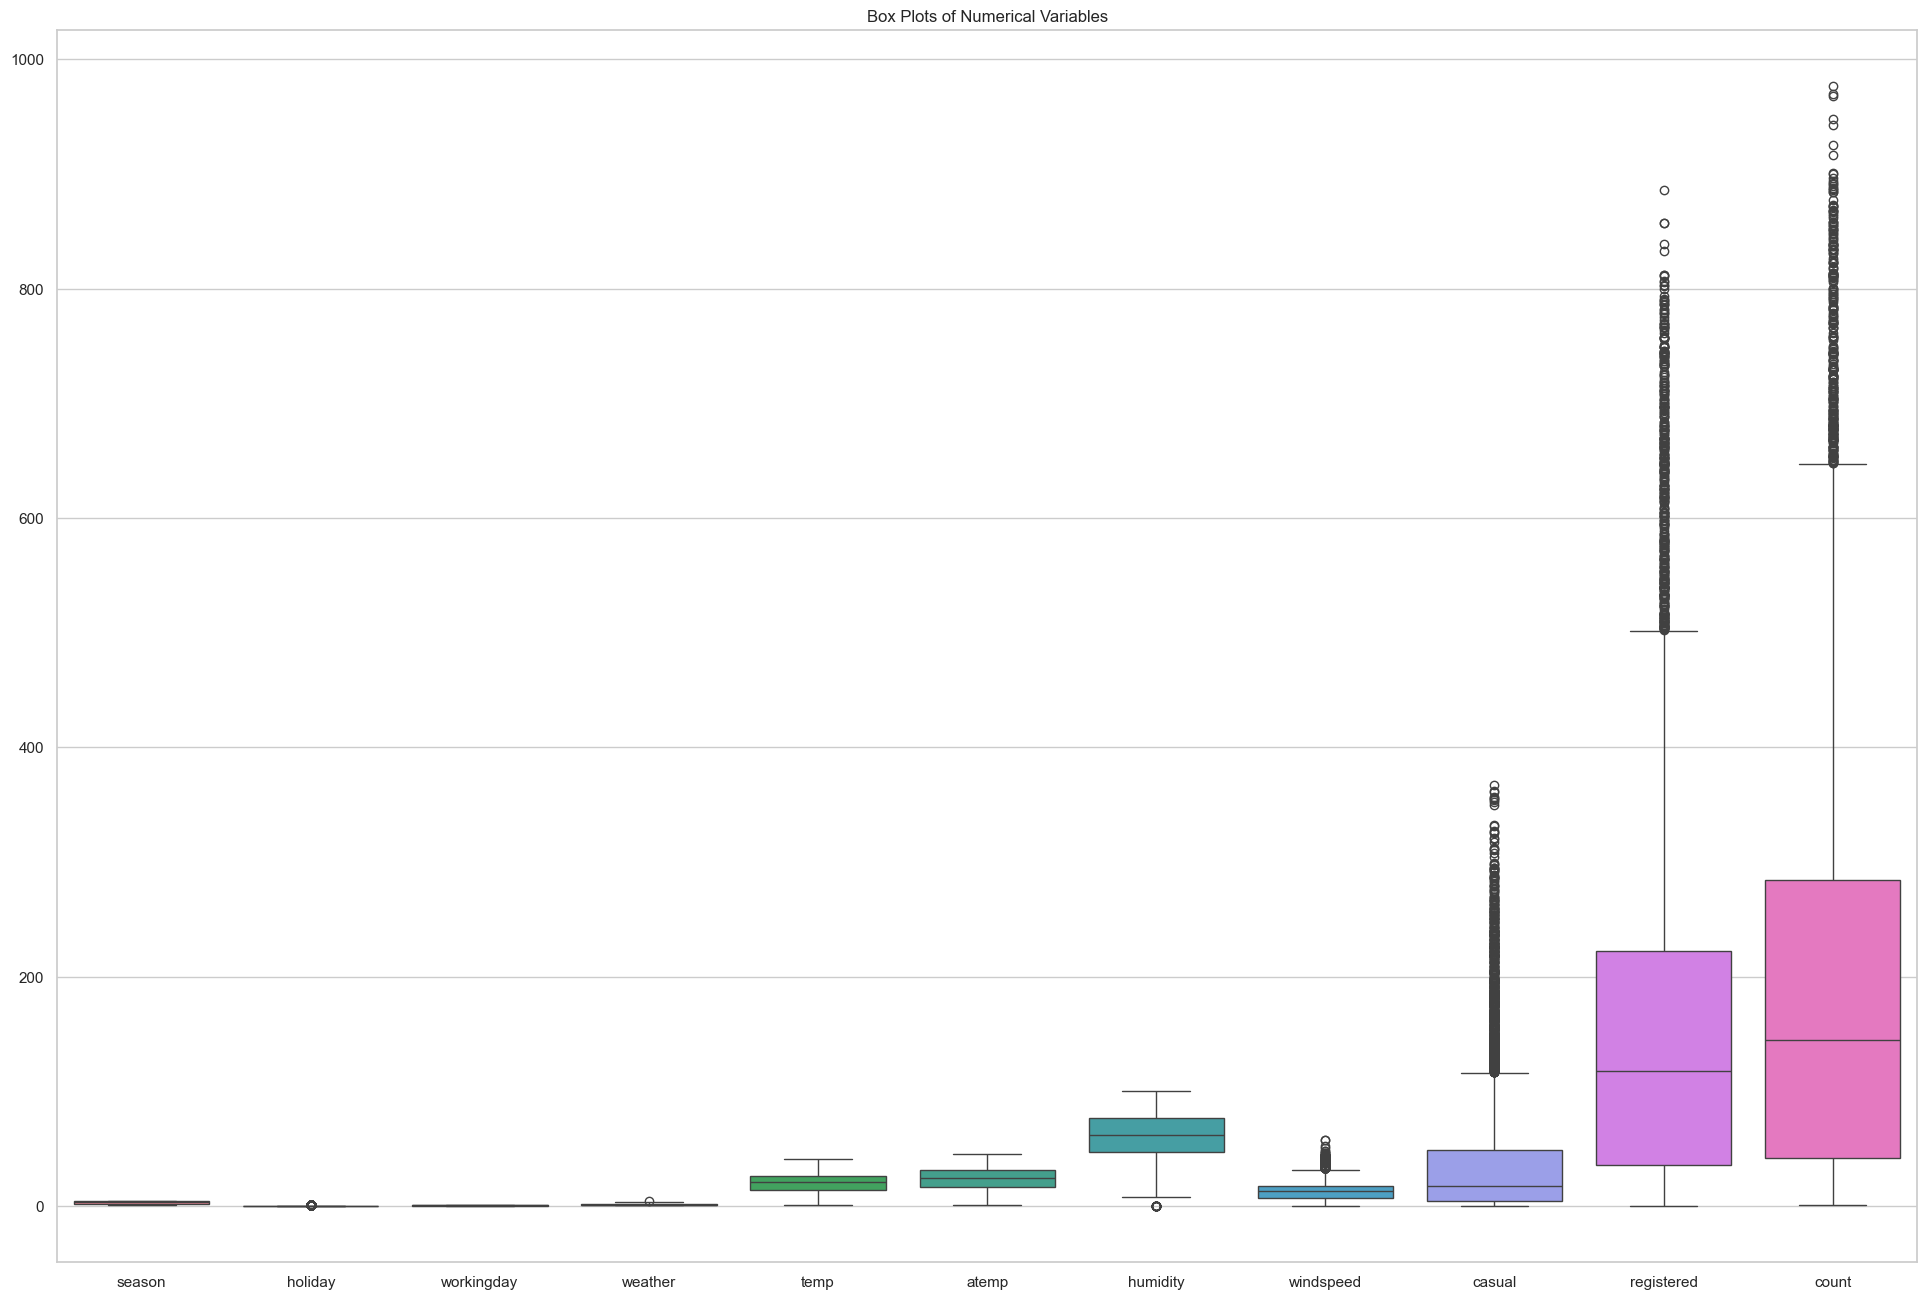

In [70]:
plt.figure(figsize=(24, 16))
sns.boxplot(data=df[num_col])
plt.xticks(rotation=0)
plt.title("Box Plots of Numerical Variables")
plt.show()


Q3  Plot the the mean of the hourly total rentals count for working and non
working days.

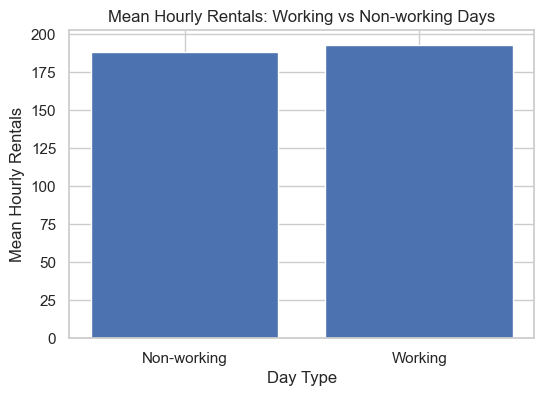

In [71]:
mean_working = df.groupby('workingday')['count'].mean()

plt.figure(figsize=(6, 4))
plt.bar(mean_working.index.astype(str), mean_working.values)

plt.xticks([0, 1], ['Non-working', 'Working'])
plt.xlabel('Day Type')
plt.ylabel('Mean Hourly Rentals')
plt.title('Mean Hourly Rentals: Working vs Non-working Days')

plt.show()

Q4 Plot the the mean of the hourly total rentals count for the different months for 
both years combined

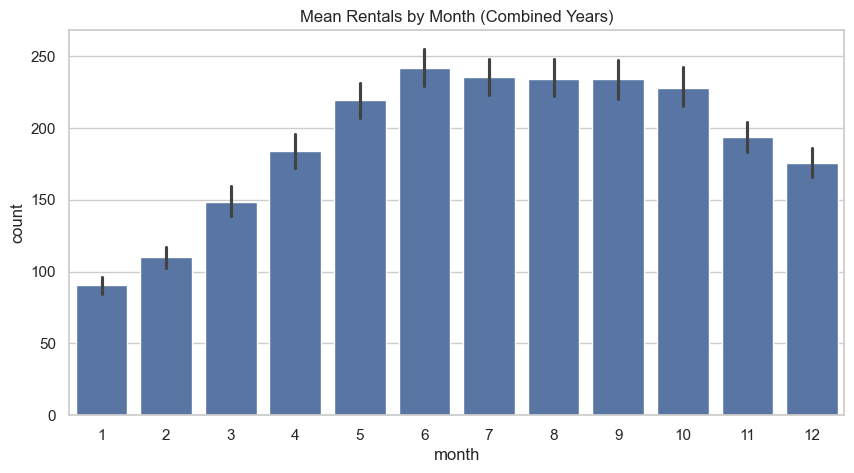

In [72]:
plt.figure(figsize=(10, 5))
sns.barplot(x='month', y='count', data=df)
plt.title('Mean Rentals by Month (Combined Years)')
plt.show()

Q5 Plot the the mean of the hourly total rentals count for the different months for 
both years separately in a multi-panel figure.

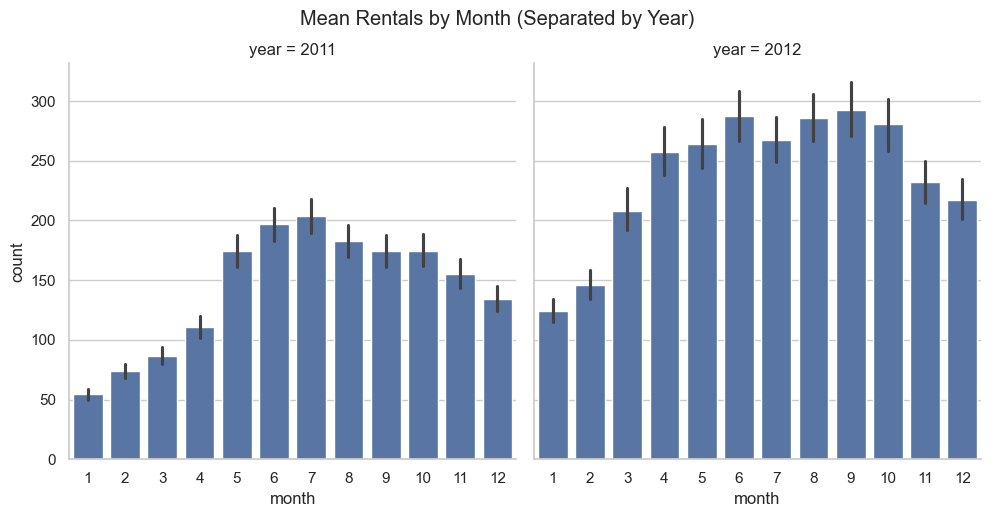

In [73]:
df= sns.catplot(x='month', y='count', col='year', data=df, kind='bar')
df.fig.suptitle('Mean Rentals by Month (Separated by Year)', y=1.03)
plt.show()

Q6 Plot the the mean and the 95% confidence interval of the hourly total rentals 
count for the four different weather categories. What can you observe ?

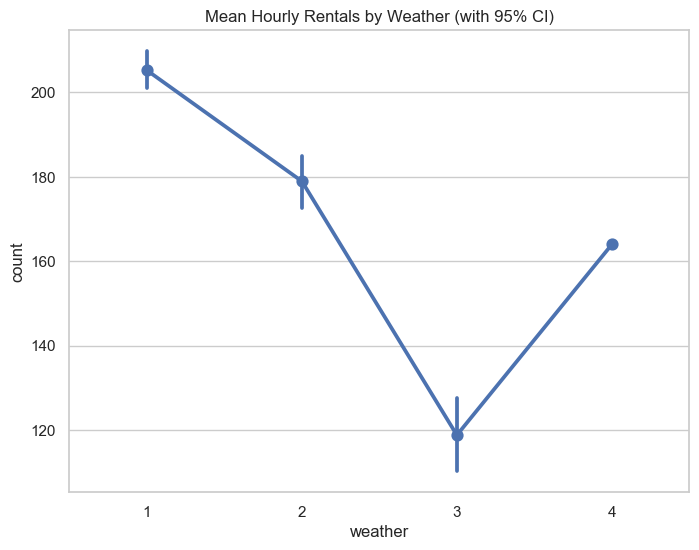

In [74]:
import pandas as pd

df= pd.read_csv("train.csv")

plt.figure(figsize=(8, 6))

sns.pointplot(x='weather', y='count', data=df)
plt.title('Mean Hourly Rentals by Weather (with 95% CI)')
plt.savefig('task6_weather.png')

Q7Plot the the mean of the hourly total rentals count versus the hour of the day. 
Which hours of the day have the highest rentals count ?

<Axes: xlabel='hour', ylabel='count'>

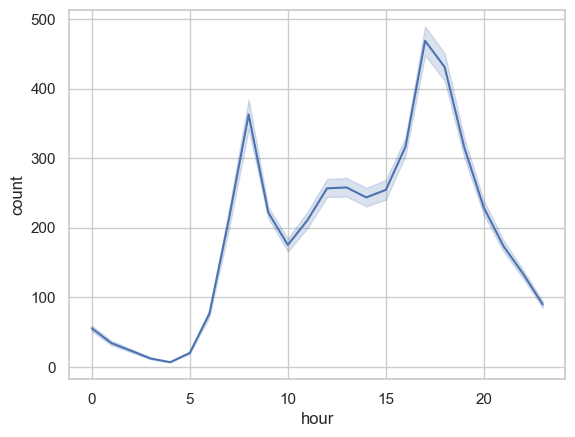

In [75]:
df['datetime'] = pd.to_datetime(df['datetime'])
df['hour'] = df['datetime'].dt.hour

sns.lineplot(x='hour', y='count', data=df)


Q8 Repeat the plot in 7 for different days of the week. What patterns can you 
observe ?

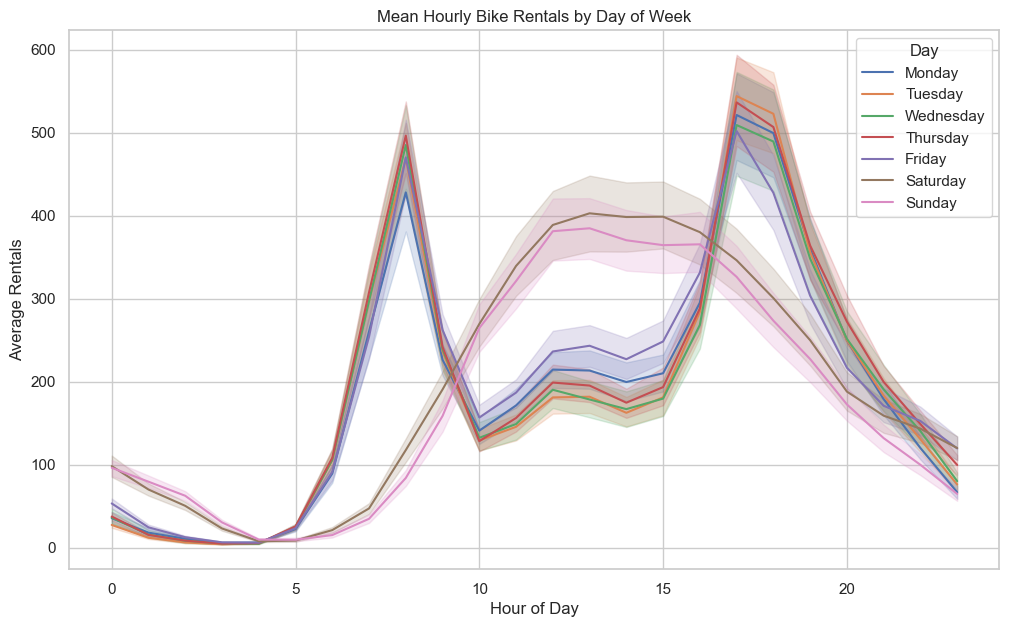

In [76]:
df['weekday'] = df['datetime'].dt.day_name()
weekday_order = [
    'Monday', 'Tuesday', 'Wednesday',
    'Thursday', 'Friday', 'Saturday', 'Sunday'
]
plt.figure(figsize=(12, 7))

sns.lineplot(
    x='hour',
    y='count',
    hue='weekday',
    hue_order=weekday_order,
    data=df
)

plt.title('Mean Hourly Bike Rentals by Day of Week')
plt.xlabel('Hour of Day')
plt.ylabel('Average Rentals')
plt.legend(title='Day')
plt.savefig('task8_hour_weekday.png')
plt.show()


Q9 Repeat the plot in 8 for the four seasons using a multi-panel figure. What 
patterns can you observe ?

Q10 Plot the the mean  and the 95% confidence interval of the hourly total rentals 
count versus the period of the day column, which you created in the first part 
of the assignment. Which period of the day has the highest rentals count ? 
Does this peak period differ for working and non-working days ?

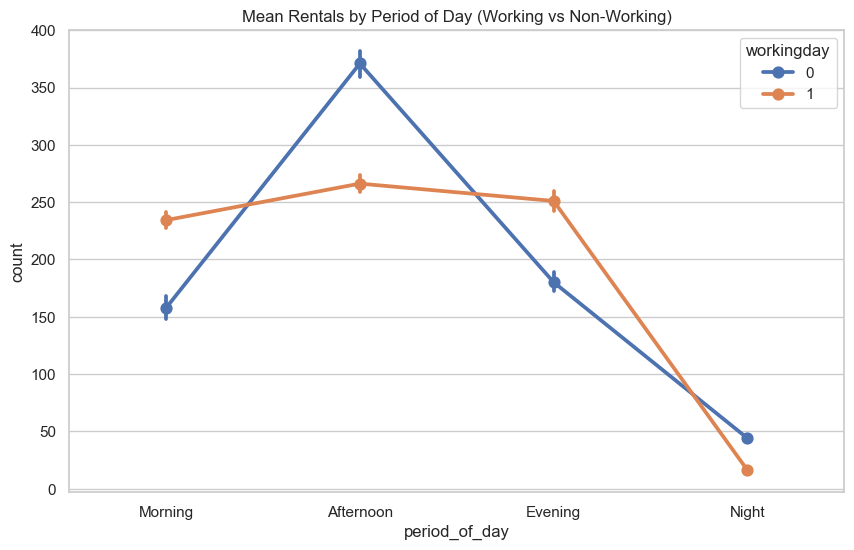

In [82]:
df['datetime'] = pd.to_datetime(df['datetime'])
df['hour'] = df['datetime'].dt.hour

def get_period(hour):
    if 0 <= hour < 6:
        return 'Night'
    elif 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    else:
        return 'Evening'

df['period_of_day'] = df['hour'].apply(get_period)
periods_order = ['Night', 'Morning', 'Afternoon', 'Evening']
plt.figure(figsize=(10, 6))
sns.pointplot(x='period_of_day', y='count', hue='workingday', data=df, order=['Morning', 'Afternoon', 'Evening', 'Night'])
plt.title('Mean Rentals by Period of Day (Working vs Non-Working)')
plt.savefig('task10_period.png')

Q11 Plot a heatmap for the correlation matrix of the dataset numerical variables. 
What observations can you make ?

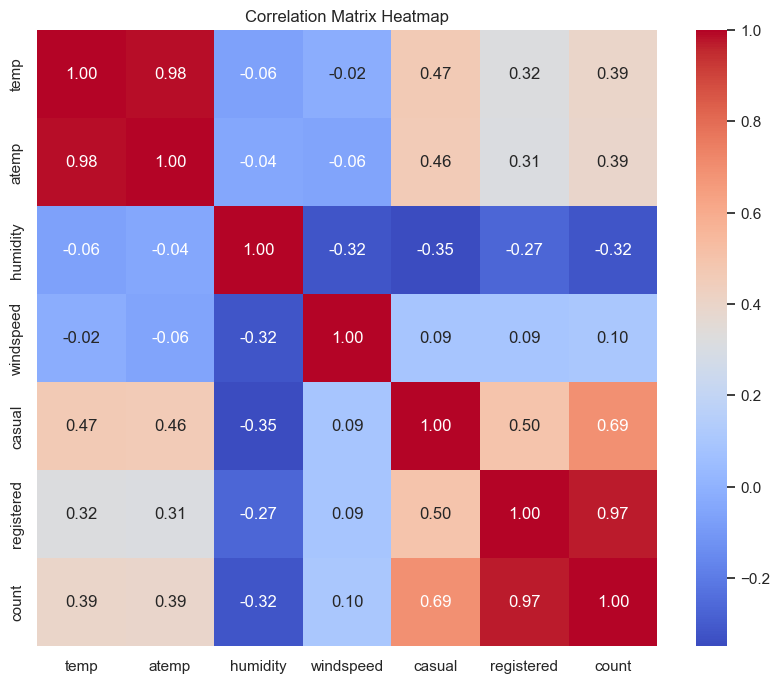

In [79]:
numerical_vars = ['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']
corr_matrix = df[numerical_vars].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.savefig('task11_heatmap.png')